***Convolutional Neural Network for the CIFAR10 data set***

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import math
from keras.preprocessing.image import  ImageDataGenerator
import keras
from keras.datasets import cifar10
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras import backend as K
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


Load CIFAR10 data set

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
train_labels = np.array(np.squeeze(y_train))
test_labels = np.array(np.squeeze(y_test))

Hyper Parameters/Variables

In [0]:
channels = 3
num_classes = 10
batchsize = 128
k = 5;
epoch = 5
rows = 32
cols = 32
splitIndex = math.ceil(x_train.shape[0] * 0.8)

Preaparing Image Data

In [0]:
def imageLabel(label_data):
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return class_names[label_data];


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, rows, cols)
    x_test = x_test.reshape(x_test.shape[0], channels, rows, cols)
    inputShape = (channels, rows, cols)
else:
    x_train = x_train.reshape(x_train.shape[0], rows, cols, channels)
    x_test = x_test.reshape(x_test.shape[0], rows, cols, channels)
    inputShape = (rows, cols, channels)

    
x_train = x_train / 255;
x_test = x_test / 255;

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Models 

In [0]:
def modelOne():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputShape))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  return model

In [0]:
def modelTwo():
  model = Sequential()
  

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputShape))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  return model

In [0]:
def modelThree():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputShape))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  
  return model

In [0]:
def modelFour():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputShape))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  
  model.add(Conv2D(num_classes, kernel_size=(3, 3), padding='same'))
  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))
  return model

Simple Hold Out Validation

In [0]:
def train(baseModel, modelId, x_train, y_train, x_test, y_test, batchsize, epoch, score):
  train_x = x_train[:splitIndex]
  train_y = y_train[:splitIndex]
  val_x = x_train[splitIndex:]
  val_y = y_train[splitIndex:]
  dataGen = ImageDataGenerator(rotation_range = 45, width_shift_range = 0.1, horizontal_flip= True, vertical_flip= False, height_shift_range= 0.1)
  dataGen.fit(train_x)
  optimizer_adam = keras.optimizers.adam(decay= 1e-6, lr= 0.001)
  model = baseModel
  model.compile(optimizer = optimizer_adam, loss = 'categorical_crossentropy', metrics=['accuracy'])
  reduce_lr = ReduceLROnPlateau('val_loss', patience = 3, verbose = 1, factor = 0.1)
  early_stop = EarlyStopping('val_loss', patience= 5)
  callBacks = [early_stop, reduce_lr]
  trainEpoch = 40000 / batchsize
  valEpoch = 10000 / batchsize
  model.fit_generator(dataGen.flow(train_x, train_y, batch_size = batchsize),steps_per_epoch= trainEpoch, validation_data=(val_x, val_y), callbacks= callBacks, epochs= epoch)
  scores = model.evaluate(x_test, y_test)
  score[modelId] = [model, scores[1]]

K-fold Validation (k=>5)

In [0]:
def train_k_fold(baseModel, x_train, y_train, x_test, y_test, batchsize, epoch):
  k_fold_dic = {}

  sum_of_accuracies = 0

  for i in range(k):

    x_train,y_train = shuffle(x_train, y_train)
    x_train_fold = x_train[:splitIndex]
    y_train_fold = y_train[:splitIndex]
    x_val_fold   = x_train[splitIndex:]
    y_val_fold   = y_train[splitIndex:]

    
    dataGen = ImageDataGenerator(rotation_range=45,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,vertical_flip=False)
    dataGen.fit(x_train_fold)
    
    optimizer_adam = keras.optimizers.adam(lr=0.001,decay=1e-6)
    
    model = baseModel
    
    model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    early_stop = EarlyStopping('val_loss', patience=5)

    reduce_lr = ReduceLROnPlateau('val_loss', patience=3, factor=0.1, verbose=1)
    
    callbacks = [early_stop, reduce_lr]
    
    train_epoch = 40000 / batchsize

    val_epoch = 10000 / batchsize

    model.fit_generator(dataGen.flow(x_train, y_train, batch_size=batchsize), epochs= epoch, steps_per_epoch= train_epoch, validation_steps= val_epoch, validation_data= (x_val_fold, y_val_fold), callbacks= callbacks)

    scores = model.evaluate(x_test, y_test)

    sum_of_accuracies += scores[1]

    k_fold_dic[i+1] = [model,scores[1]] # selecting the best model based on accuracy on test, we can also do this by loss as well.
    
  
  
  average_score = sum_of_accuracies / 5;

  score_delta = 100 # some max number
  final_model = 0
  final_score = 0

  for fold in k_fold_dic:
    if(score_delta > abs(k_fold_dic[fold][1] - average_score)):
      score_delta = abs(k_fold_dic[fold][1] - average_score)
      final_model = k_fold_dic[fold][0]
      final_model_score = k_fold_dic[fold][1]
      
  return final_model, final_model_score

**Training with Simple Hold out validation**

In [12]:
score = {}
train(modelOne(), 1, x_train, y_train, x_test, y_test, batchsize, epoch, score)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
313/312 [==============================] - 28s 90ms/step - loss: 1.8146 - acc: 0.3265 - val_loss: 1.5128 - val_acc: 0.4500
Epoch 2/5
313/312 [==============================] - 24s 77ms/step - loss: 1.5172 - acc: 0.4487 - val_loss: 1.3081 - val_acc: 0.5290
Epoch 3/5
313/312 [==============================] - 25s 80ms/step - loss: 1.3604 - acc: 0.5116 - val_loss: 1.1563 - val_acc: 0.5903
Epoch 4/5
313/312 [==============================] - 25s 79ms/step - loss: 1.2732 - acc: 0.5479 - val_loss: 1.0902 - val_acc: 0.6124
Epoch 5/5
10000/10000 [==============================] - 2s 183us/step


In [13]:
train(modelTwo(), 1, x_train, y_train, x_test, y_test, batchsize, epoch, score)

Epoch 1/5
313/312 [==============================] - 31s 98ms/step - loss: 1.9540 - acc: 0.3842 - val_loss: 1.8010 - val_acc: 0.4143
Epoch 2/5
313/312 [==============================] - 28s 89ms/step - loss: 1.4152 - acc: 0.5108 - val_loss: 1.4536 - val_acc: 0.5069
Epoch 3/5
313/312 [==============================] - 28s 89ms/step - loss: 1.2319 - acc: 0.5673 - val_loss: 1.3253 - val_acc: 0.5663
Epoch 4/5
313/312 [==============================] - 28s 89ms/step - loss: 1.1261 - acc: 0.6036 - val_loss: 0.9844 - val_acc: 0.6572
Epoch 5/5
10000/10000 [==============================] - 2s 227us/step


In [14]:
train(modelThree(), 1, x_train, y_train, x_test, y_test, batchsize, epoch, score)

Epoch 1/5
313/312 [==============================] - 24s 78ms/step - loss: 1.8327 - acc: 0.3240 - val_loss: 1.5302 - val_acc: 0.4322
Epoch 2/5
313/312 [==============================] - 23s 73ms/step - loss: 1.5457 - acc: 0.4369 - val_loss: 1.2886 - val_acc: 0.5326
Epoch 3/5
313/312 [==============================] - 23s 74ms/step - loss: 1.4311 - acc: 0.4817 - val_loss: 1.2206 - val_acc: 0.5589
Epoch 4/5
313/312 [==============================] - 23s 73ms/step - loss: 1.3395 - acc: 0.5173 - val_loss: 1.1630 - val_acc: 0.5818
Epoch 5/5
10000/10000 [==============================] - 2s 153us/step


In [15]:
train(modelFour(), 1, x_train, y_train, x_test, y_test, batchsize, epoch, score)

Epoch 1/5
313/312 [==============================] - 32s 103ms/step - loss: 1.6617 - acc: 0.3928 - val_loss: 1.6626 - val_acc: 0.4712
Epoch 2/5
313/312 [==============================] - 31s 98ms/step - loss: 1.3345 - acc: 0.5187 - val_loss: 1.1698 - val_acc: 0.5736
Epoch 3/5
313/312 [==============================] - 28s 90ms/step - loss: 1.1856 - acc: 0.5723 - val_loss: 1.2131 - val_acc: 0.5928
Epoch 4/5
313/312 [==============================] - 30s 95ms/step - loss: 1.0847 - acc: 0.6146 - val_loss: 1.0752 - val_acc: 0.6323
Epoch 5/5
10000/10000 [==============================] - 2s 225us/step


**Best Model Selection and model selection for K-fold validation**

In [16]:
bestModelID, bestModel, bestScore = 0,0,0
for modelId in score:
  if(bestScore < score[modelId][1]):
    bestModelId = modelId
    bestScore = score[modelId][1]
    bestModel = score[modelId][0]
print("Best model:", bestModelId)
print("Score of the model:", bestScore)

K_fold_model = 0

if(bestModelId == 1):
  k_fold_model = modelOne()
elif(bestModelId == 2):
  k_fold_model = modelTwo()
elif(bestModelId == 3):
  k_fold_model = modelThree()
elif(bestModelId == 4):
  k_fold_model = modelFour()
else:
  k_fold_model = modelFive()


Best model: 1
Score of the model: 0.5936


**Training with K-fold validation**

In [17]:
ResModel, ResScore = train_k_fold(k_fold_model, x_train, y_train, x_test, y_test, batchsize, epoch)  

Epoch 1/5
313/312 [==============================] - 25s 80ms/step - loss: 1.8400 - acc: 0.3093 - val_loss: 1.4569 - val_acc: 0.4699
Epoch 2/5
313/312 [==============================] - 24s 76ms/step - loss: 1.5021 - acc: 0.4510 - val_loss: 1.2328 - val_acc: 0.5566
Epoch 3/5
313/312 [==============================] - 23s 74ms/step - loss: 1.3620 - acc: 0.5096 - val_loss: 1.1405 - val_acc: 0.5992
Epoch 4/5
313/312 [==============================] - 24s 76ms/step - loss: 1.2670 - acc: 0.5455 - val_loss: 1.0230 - val_acc: 0.6367
Epoch 5/5
10000/10000 [==============================] - 2s 165us/step
Epoch 1/5
313/312 [==============================] - 26s 83ms/step - loss: 1.1464 - acc: 0.5944 - val_loss: 0.9730 - val_acc: 0.6556
Epoch 2/5
313/312 [==============================] - 23s 73ms/step - loss: 1.1001 - acc: 0.6080 - val_loss: 0.8859 - val_acc: 0.6857
Epoch 3/5
313/312 [==============================] - 24s 76ms/step - loss: 1.0612 - acc: 0.6256 - val_loss: 0.8962 - val_acc: 0.688

**K-Fold validation Score**

In [21]:
print("Best Model using K-fold model", ResModel)
print("Model Score", ResScore)

Best Model using K-fold model <keras.engine.sequential.Sequential object at 0x7fa2d3162780>
Model Score 0.7288


***Confusion Matrix***

**simple Hold Out Validation**

In [24]:
y_pred = np.argmax(bestModel.predict(x_test), axis = 1)
cm = confusion_matrix(y_true= test_labels, y_pred = y_pred)
print(cm)

[[517 136  10   0   7   1   7   7 201 114]
 [  1 925   0   0   0   1   5   0   4  64]
 [ 78  97 353  29  28  35 206  29  74  71]
 [ 15  97  25 238  17  69 298  43  94 104]
 [ 18  25  51  17 353   4 359  94  33  46]
 [  0  77  18  89  18 380 190  68  59 101]
 [  2  31  11  10   3   4 878   4  23  34]
 [  5  79   8  11  17  15  55 652  15 143]
 [ 24  95   1   1   1   0   6   0 815  57]
 [  4 150   0   1   0   0   7   2  11 825]]


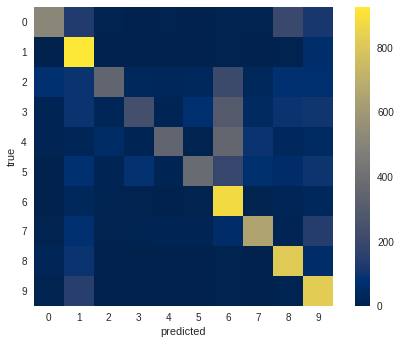

In [28]:
plt.imshow(cm, interpolation=None, cmap=plt.cm.cividis)
plt.grid(None)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

**K-Fold Validation**

In [30]:
y_pred_1 = np.argmax(bestModel.predict(x_test), axis = 1)
cm_1 = confusion_matrix(y_true = test_labels, y_pred= y_pred_1)
print(cm_1)

[[517 136  10   0   7   1   7   7 201 114]
 [  1 925   0   0   0   1   5   0   4  64]
 [ 78  97 353  29  28  35 206  29  74  71]
 [ 15  97  25 238  17  69 298  43  94 104]
 [ 18  25  51  17 353   4 359  94  33  46]
 [  0  77  18  89  18 380 190  68  59 101]
 [  2  31  11  10   3   4 878   4  23  34]
 [  5  79   8  11  17  15  55 652  15 143]
 [ 24  95   1   1   1   0   6   0 815  57]
 [  4 150   0   1   0   0   7   2  11 825]]


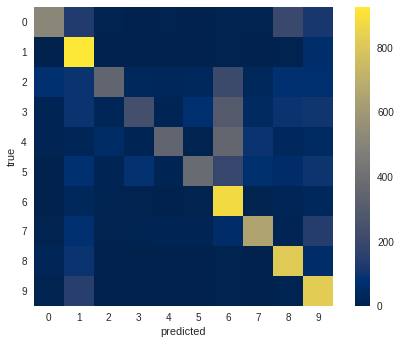

In [31]:
plt.imshow(cm, interpolation=None, cmap=plt.cm.cividis)
plt.grid(None)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()